<a href="https://colab.research.google.com/github/swaroopkasaraneni/AI/blob/main/TextClassification2Case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are given 3 CSV Files for the following 3 questions respectively.
 1. HouseData.csv
 2. Marketing.csv
 3. Results.csv

1. Write a function which accepts a CSV file location and split the data randomly in the file into 60% and 40% and save it in two different files namely “First.csv” and “Second.csv”. Run this function for HouseData.csv


In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

def split_csv(file_path):
    """
    Splits a CSV file into two parts (60% and 40%) and saves them as 'First.csv' and 'Second.csv'.

    :param file_path: str, the file path of the CSV to split
    """
    try:
        data = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    train_data, test_data = train_test_split(data, test_size=0.4, random_state=42)

    # Extract directory and file name for saving
    dir_name = os.path.dirname(file_path)
    first_file = os.path.join(dir_name, "First.csv")
    second_file = os.path.join(dir_name, "Second.csv")

    # Save the split datasets
    train_data.to_csv(first_file, index=False)
    test_data.to_csv(second_file, index=False)

    print(f"Data has been split and saved as:\n60% -> {first_file}\n40% -> {second_file}")

# Example usage
split_csv("HouseData.csv")


Data has been split and saved as:
60% -> First.csv
40% -> Second.csv


2. Write a function which accepts a CSV and performs Label Encoding for the “Class” column of that file,creates a new Column called “Label” and saves the result in the same file.Run this function for Marketing.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_class_column(file_path):
    try:

        data = pd.read_csv(file_path)

        if 'class' not in data.columns:
            print("The column 'class' does not exist in the dataset.")
            return

        le = LabelEncoder()
        data['Label'] = le.fit_transform(data['class'])

        data.to_csv(file_path, index=False)
        print(f"Label Encoding performed successfully. Updated file saved at: {file_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

encode_class_column("Marketing.csv")


Label Encoding performed successfully. Updated file saved at: Marketing.csv


3. Write a function which accepts a CSVwhich has two columns: “ActualValues” and “PredictedValues”. Youneed to design a confusion matrix and give values for the following:
 1. Accuracy
 2. Misclassification Rate
 3. True Positive Rate
 4. False Positive Rate
 5. Specificity
 6. Precision
 7. Null Error Rate

 Also plot the ROC Curve Provide your understanding for each of them in a sentence or two.Run this function for Results.csv


Accuracy: 0.5081
Misclassification Rate: 0.4919
True Positive Rate (Sensitivity): 0.1745
False Positive Rate: 0.1335
Specificity: 0.8665
Precision: 0.5841
Null Error Rate: 0.5179


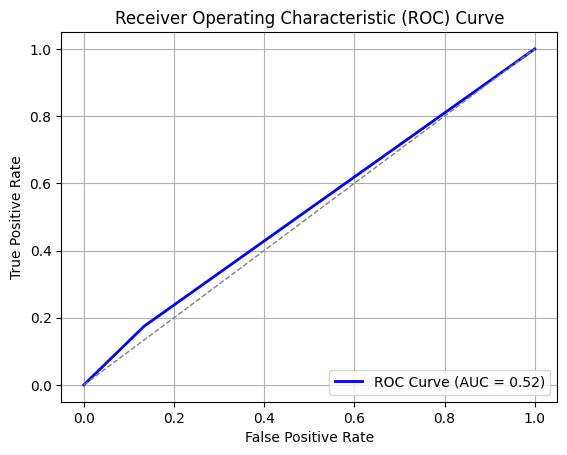

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


try:

    data = pd.read_csv("Results.csv")

    # Check if required columns exist
    if not all(col in data.columns for col in ['ActualValues', 'PredictedValues']):
        print("The CSV file must contain 'ActualValues' and 'PredictedValues' columns.")
    else:

      y_actual = data['ActualValues']
      y_pred = data['PredictedValues']
      tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()

      # Calculate metrics
      accuracy = (tp + tn) / (tp + tn + fp + fn)
      misclassification_rate = (fp + fn) / (tp + tn + fp + fn)
      true_positive_rate = tp / (tp + fn)
      false_positive_rate = fp / (fp + tn)
      specificity = tn / (tn + fp)
      precision = tp / (tp + fp)
      null_error_rate = max(y_actual.mean(), 1 - y_actual.mean())

      print(f"Accuracy: {accuracy:.4f}")
      print(f"Misclassification Rate: {misclassification_rate:.4f}")
      print(f"True Positive Rate (Sensitivity): {true_positive_rate:.4f}")
      print(f"False Positive Rate: {false_positive_rate:.4f}")
      print(f"Specificity: {specificity:.4f}")
      print(f"Precision: {precision:.4f}")
      print(f"Null Error Rate: {null_error_rate:.4f}")

      # ROC Curve
      fpr, tpr, _ = roc_curve(y_actual, y_pred)
      roc_auc = auc(fpr, tpr)

      plt.figure()
      plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
      plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC) Curve')
      plt.legend(loc="lower right")
      plt.grid()
      plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


